<a href="https://colab.research.google.com/github/hvmdvvn/Artificial-Neural-Networks/blob/main/Lab_03_Preceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Activity 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data():
  URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
  data = pd.read_csv(URL_, header = None)
  print(data)
  # make the dataset linearly separable
  data = data[:100]
  data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
  data = np.asmatrix(data, dtype = 'float64')
  return data

data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


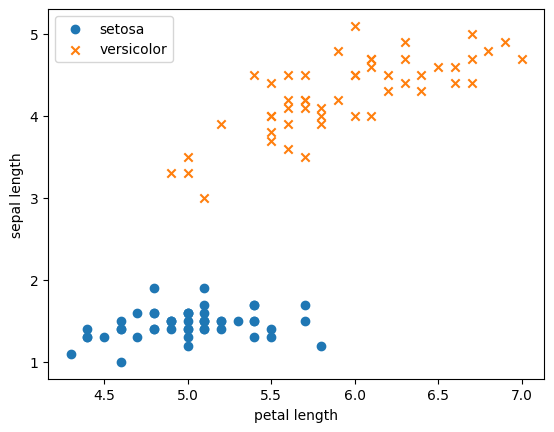

In [2]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [12]:
import numpy as np

def perceptron(data, num_iter):
    features = np.array(data[:, :-1])   # ensure ndarray, not matrix
    labels = np.array(data[:, -1])      # ensure 1D labels

    # initialize weights (1D vector)
    w = np.zeros(features.shape[1] + 1)
    misclassified_ = []

    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            # add bias term and force into 1D
            x = np.insert(np.array(x).flatten(), 0, 1)

            # prediction
            y = np.dot(w, x)
            target = 1.0 if (y > 0) else 0.0

            delta = int(label) - target

            if delta != 0:  # misclassified
                misclassified += 1
                w += delta * x

        # store misclassified count per epoch
        misclassified_.append(misclassified)

    return w, misclassified_

# Example usage
num_iter = 10
w, misclassified_ = perceptron(data, num_iter)
print("Final weights:", w)
print("Misclassifications per epoch:", misclassified_)


Final weights: [-1.  -1.1 -3.6  5.2  2.2]
Misclassifications per epoch: [1, 3, 1, 0, 0, 0, 0, 0, 0, 0]


/tmp/ipython-input-3287161922.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta = int(label) - target


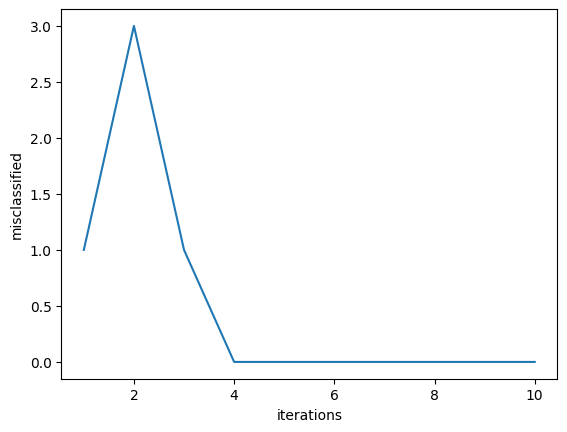

In [13]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

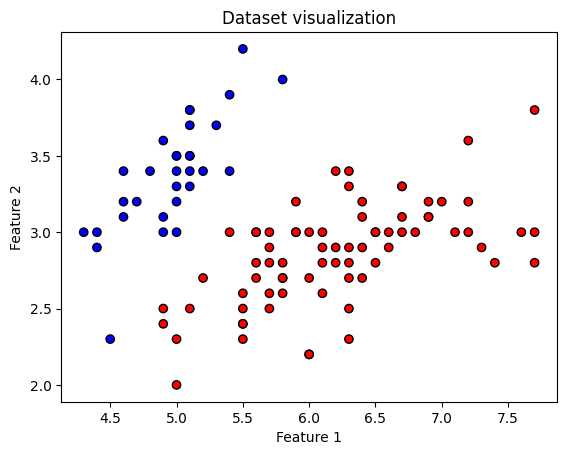

In [14]:
# Lab Task 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data[:, :2]   # take first 2 features for easy visualization
y = (iris.target != 0).astype(int)  # convert to binary classification (0 vs not-0)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# visualize
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset visualization')
plt.show()

# Prepare dataset in same format as your perceptron function expects
train_data = np.hstack((X_train, y_train.reshape(-1, 1)))


In [15]:
# Lab Task 2

def perceptron(data, num_iter):
    features = np.array(data[:, :-1])
    labels = np.array(data[:, -1])

    # initialize weights (bias included)
    w = np.zeros(features.shape[1] + 1)
    misclassified_ = []

    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            # add bias and flatten to 1D
            x = np.insert(np.array(x).flatten(), 0, 1)

            # prediction
            y = np.dot(w, x)
            target = 1.0 if (y > 0) else 0.0

            delta = int(label) - target
            if delta != 0:
                misclassified += 1
                w += delta * x

        misclassified_.append(misclassified)

    return w, misclassified_


Final weights: [-10.   33.9 -52.2]


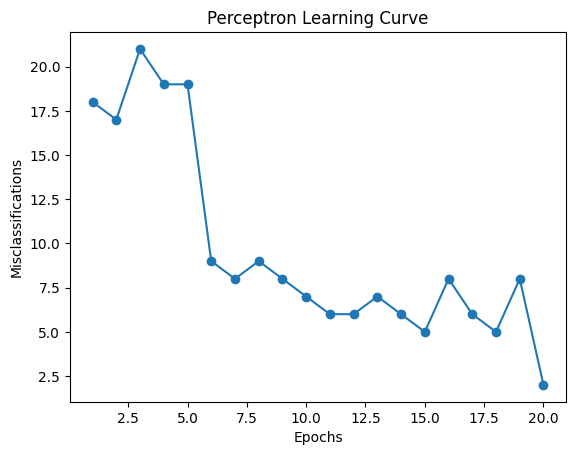

In [16]:
num_iter = 20
w, misclassified_ = perceptron(train_data, num_iter)

print("Final weights:", w)

# Plot learning curve
plt.plot(range(1, num_iter+1), misclassified_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassifications')
plt.title('Perceptron Learning Curve')
plt.show()
